# CMSC 197 Problem Set

Adrian Miguel Custodio

In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

##### For Buildin and Validation of the Model #####
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error




# 1. Load Advertising.csv dataset using pandas



In [2]:
# Load the data
df = pd.read_csv("Advertising.csv", index_col = 0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# Get summary of statistics of the data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# 2. Standardize each column of the dataset

In [4]:
#Using dataframe to look more presentable
#scale(df) is used to standardize the tables

df_stndrdzd = pd.DataFrame(scale (df), columns=df.columns)
df_stndrdzd

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


# 3. Add extra column of ones

In [5]:
df_stndrdzd.insert(0,'bias',1)
df_stndrdzd

,bias,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


# 4. Divide the dataset into training and testing

In [6]:
#split the data into response (y) and regressors (x)
y = df_stndrdzd['Sales']
x = df_stndrdzd.drop("Sales", axis = 1)

#Divdes the dataset into 25% going to testing and 75% into training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,  train_size=0.75,  random_state = 10)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 4)
y_train size: (150,)

x_test size: (50, 4)
y_test size: (50,)


# 5. Fit the model on the training set

## 5.1 initialize weights

In [7]:
def initialize_weights():
    import random
    random.seed(10)
    
    weight_array = []
    
    #loop to create the random weights array
    for i in range (4):
        r = random.uniform(0, 1)
        weight_array.append(r)
        
    return np.array(weight_array)


In [8]:
initialize_weights()

array([0.57140259, 0.42888905, 0.5780913 , 0.20609823])

## 5.2 predict y

In [9]:
#this function predicts the values by getting the dot product of the dataset and weights
def predict(x, weights):
    return np.dot(x, weights)

## 5.3 compute_cost

In [10]:
#this function calculates the cost using the ff. equation:
#(1/2m)*sum((predicted y - y)**2)
def compute_cost(y_hat, y):
    m = len(y)
    cost = (1/(2*m)) * np.dot((y_hat - y).T, (y_hat - y))
    return cost

## 5.4 compute_gradient

In [44]:
#this function computes the gradient using the ff. equation:
#(1/m)*sum((predicted y - y)*x)
def compute_gradient(x, y, y_hat):
    m = len(y)
    w = 1/m * np.dot(x.T, (y_hat - y))
    return w
        

## 5.5 update_weights

In [13]:
#function for updating weights by subrating the product of 'a' and gradient from the current weights
def update_weights(curr_weights, a, gradient):
    return curr_weights - (a * gradient)
    

## 5.6 grad_descent

In [14]:
#returns 2 matrices: 
# >matrix for weights
# >matrix for costs per iteration

def grad_descent(x, y, a, iterations):
    initWeight = initialize_weights()
    
    #empty array for the matrices
    costMatrix = []
    weightsMatrix = []
    
    for i in range(iterations):
        #predicted y
        y_hat = predict(x, initWeight)
        
        #calculate the costs per iteration
        cost = compute_cost(y_hat, y)

        #get the gradient/derivatives
        gradient = compute_gradient(x,y,y_hat)

        #weights get updated
        initWeight = update_weights(initWeight, a, gradient)
        
        costMatrix.append(cost)
        weightsMatrix.append(initWeight)

    
    return weightsMatrix, costMatrix

## 5.7 plot_costs

In [15]:
#this function is for displaying the graph of costs per iteration
def plot_costs(costs):
    
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    
    plt.plot(costs)
    plt.show()

## 5.8 Predict y for train set and calculate the cost.

In [16]:
#weights are initialized to get the predicted y
weights = initialize_weights()
y_hat_training = predict(x_train, weights)

#cost is calculated from the y hat
train_cost = compute_cost(y_hat_training, y_train)
print("Cost of training set: ", train_cost)

Cost of training set:  0.2338252692581827


## 5.9 Predict y for test set and calculate the cost.

In [17]:
#same process from 5.8 is applied to the Test set
weights = initialize_weights()
y_hat_testing = predict(x_test, weights)

test_cost = compute_cost(y_hat_testing, y_test)
print("Cost of training set: ", test_cost)

Cost of training set:  0.453296972651333


# 6. Predict the quantitative response y on the train set.

In [45]:
#use grad_descent to get the two matrices
w_train, cost_train = grad_descent(x_train, y_train, 0.01, 1000)

In [47]:
training_y_hat= predict(x_train, w_train[-1])

#shows a table that compares the values of y-hat and actual y
training_y_df = pd.DataFrame({'y_train Prediction': training_y_hat, 'y_train Real': y_train})

display(training_y_df)

,y_train Prediction,y_train Real
24,-1.060423,-0.830548
43,-0.033073,-0.215683
101,1.701700,1.878700
163,0.685783,0.764258
21,0.096081,-0.292541
...,...,...
113,0.456099,0.360753
64,0.630436,0.764258
15,1.327974,1.609697
125,-0.890298,-0.657617


In [21]:
computed_train = compute_cost(training_y_hat,y_train)

print("Cost of train set: ", computed_train)

Cost of train set:  0.033085722796398126


In [22]:
print("Train Set MSE Value: ",mean_squared_error(training_y_hat,y_train))

Train Set MSE Value:  0.06617144559279624


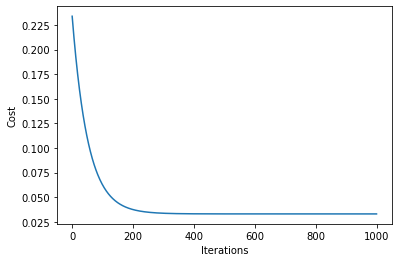

In [48]:
plot_costs(cost_train)

Using MSE, we are given the value of 0.6617. The value being close to zero implies that the model is much more accurate. The graph of cost to iterations shows that the cost gets lower per iteration, proving that the cost used for the train data was the most accurate one it can provide.

# 7.Predict the quantitative response y on the test set

In [23]:
#perform gradual descent to the test set
w_test, cost_test = grad_descent(x_test, y_test, 0.01, 1000)

testing_y_hat= predict(x_test, w_test[-1])
testing_y_df = pd.DataFrame({'y_test Prediction': testing_y_hat, 'y_test Real': y_test})
display(testing_y_df)

,y_test Prediction,y_test Real
59,0.742859,0.841116
5,-0.480611,-1.310911
20,0.831943,0.764258
198,2.003624,2.205347
52,1.277843,1.648126
19,-0.068201,0.110964
162,0.149866,0.168607
55,1.407356,1.859486
69,1.337577,1.590482
2,-0.510469,-0.907406


In [24]:
computed_test = compute_cost(testing_y_hat,y_test)

print("Cost of test set: ", computed_test)

Cost of test set:  0.09155762816464964


In [25]:
print("Test Set MSE Value: ", mean_squared_error(testing_y_hat,y_test))


Test Set MSE Value:  0.1831152563292993


The MSE value of the test set is 0.1831. This value, while being fairly accurate due to being close to zero, is greater than the training set. 

# 8. Revert back a standardized data to original form 

In [26]:
#copy over the standardized dataset
df_revert = df_stndrdzd.copy()

df_revert.drop('bias', axis=1, inplace=True)

df_revert

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [27]:
#these processes reverts all the values of the dataset back to original

df_revert['TV'] = df_revert['TV'] * df['TV'].std() + df['TV'].mean()
df_revert['Radio'] = df_revert['Radio'] * df['Radio'].std() + df['Radio'].mean()
df_revert['Newspaper'] = df_revert['Newspaper'] * df['Newspaper'].std() + df['Newspaper'].mean()
df_revert['Sales'] = df_revert['Sales'] * df['Sales'].std() + df['Sales'].mean()

df_revert

,TV,Radio,Newspaper,Sales
0,230.308426,37.836477,69.296979,22.120270
1,44.242678,39.340241,45.136502,10.390910
2,16.874171,45.956803,69.397230,9.288149
3,151.511186,41.345260,58.570128,18.511236
4,180.884712,10.768723,58.469877,12.897183
...,...,...,...,...
195,37.926869,3.650906,13.757957,7.583883
196,94.067396,4.853917,8.043654,9.689153
197,177.075176,9.264959,6.339388,12.796932
198,283.942679,42.047016,66.289451,25.528802


In [28]:
#to check if the predictions differ from the original data, we perform a prediction using the unstradized values
predict_sales = predict(df_stndrdzd[['bias', 'TV', 'Radio', 'Newspaper']], w_train[-1])

df_revert['Predicted Sales'] = predict_sales

df_revert['Predicted Sales'] = df_revert['Predicted Sales'] * df['Sales'].std() + df['Sales'].mean()

sales_compare =  pd.DataFrame({'Sales': df_revert['Sales'] ,'Predicted Sales': df_revert['Predicted Sales']})
display(sales_compare)

,Sales,Predicted Sales
0,22.120270,20.452120
1,10.390910,12.856621
2,9.288149,12.895206
3,18.511236,17.797090
4,12.897183,13.093443
...,...,...
195,7.583883,5.730269
196,9.689153,8.387667
197,12.796932,12.807962
198,25.528802,23.579730


Reverting the Standardized form data back to its original, along with a new column that shows the predicted sales, tells us that the predictions are almost close to the actual values.

# 9. Observe the cost results and analyse. 

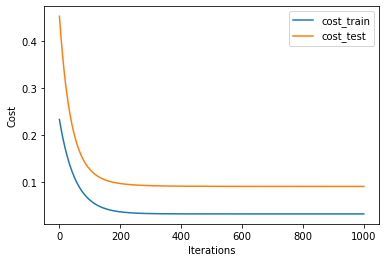

In [29]:
#graph to show the results of the train set costs and test set costs

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(cost_train, label='cost_train')
plt.plot(cost_test, label='cost_test')
plt.legend()
plt.show()

Looking at the graph, the costs of both the train and test sets decrease as the iteration continues, showing that the gradient descent algorithm did work in lowering and achieving the most accurate cost to use in the formulas.

# Questions:

# Q.1

In [30]:
# Grad_descent for question 1 only, where the weights are all zeroes
def q1_grad_descent(x, y, a, iterations):
    initWeight = np.array([0.0, 0.0, 0.0, 0.0])
    costMatrix = []
    weightsMatrix = []
    
    for i in range(iterations):
        y_hat = predict(x, initWeight)

        cost = compute_cost(y_hat, y)

        gradient = compute_gradient(x,y,y_hat)

        initWeight = update_weights(initWeight, a, gradient)
        
        costMatrix.append(cost)
        weightsMatrix.append(initWeight)

    
    return weightsMatrix, costMatrix

In [31]:
q1_weights,q1_cost = q1_grad_descent(x_train, y_train, 0.01, 10000) 

#get the last value of q1_grad_descent
optimal_w = q1_weights[-1]

print("Initialized Weights: ",optimal_w)


Initialized Weights:  [ 0.02864184  0.70472213  0.55484697 -0.01371957]


plugging into the formula,

h_𝜃(x) = 0.02864184 + 0.70472213*TV + 0.55484697*Radio + (-0.01371957)*Newspaper

TV is the highest among the weights while Newspaper is the lowest, showing that TV contributes the most when it comes to Sales.

# Q.2

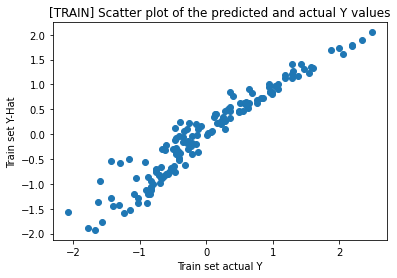

Train Set r^2 score:  0.9238935852366272


In [32]:
#Provide a scatter plot of the y hat and actual y for both the train and test set. 
q2_train_y_hat = predict(x_train, optimal_w)

plt.scatter(y_train, q2_train_y_hat)
plt.title('[TRAIN] Scatter plot of the predicted and actual Y values')

plt.xlabel('Train set actual Y')
plt.ylabel('Train set Y-Hat')
plt.show()

print("Train Set r^2 score: ", r2_score(y_train,q2_train_y_hat))

There is an upward trend for the train set for its predicted and actual Y values. The r^2 score is also in the line of 90, with the 92.38% showing the graph is pretty accurate.

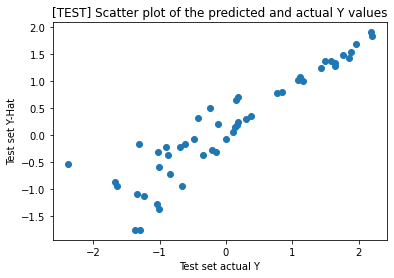

Train Set r^2 score:  0.8366843974055221


In [33]:
#Provide a scatter plot of the y hat and actual y for both the train and test set. 
q2_test_y_hat = predict(x_test, optimal_w)

plt.scatter(y_test, q2_test_y_hat)
plt.title('[TEST] Scatter plot of the predicted and actual Y values')

plt.xlabel('Test set actual Y')
plt.ylabel('Test set Y-Hat')
plt.show()

print("Train Set r^2 score: ", r2_score(y_test,q2_test_y_hat))

Just like the Train dataset, there is an upwards trend of both y values. The difference is that the r^2 score did not reach 90% but still fairly accurate at 83%

# Q.3

,Q3 Error 1
24,0.384303
43,0.436099
101,0.537277
163,0.169947
21,0.520099
...,...
113,0.213886
64,0.417448
15,0.306798
125,0.376421


1st Q3 r^2 :  0.5433015811081796


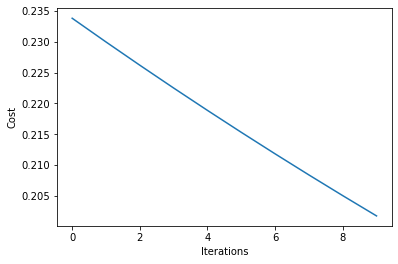

In [35]:
#we perform gradient descent four times but with different iterations

q3_w1, q3_c2 = grad_descent(x_train, y_train, 0.01, 10) 
q3_y_hat1 = predict(x_train, q3_w1[-1],)

#finding the error
q3_error1 = q3_y_hat1 - y_train 

error_df1 = pd.DataFrame({'Q3 Error 1': q3_error1})
display(error_df1)

#finding the r^2 score
print("1st Q3 r^2 : ", r2_score(y_train,q3_y_hat1))

#shows the cost per iteration
plot_costs(q3_c2)

,Q3 Error 2
24,0.033469
43,0.270005
101,0.098495
163,0.014369
21,0.418940
...,...
113,0.124817
64,0.094573
15,-0.045872
125,0.024979


2nd Q3 r^2 :  0.8564535379253215


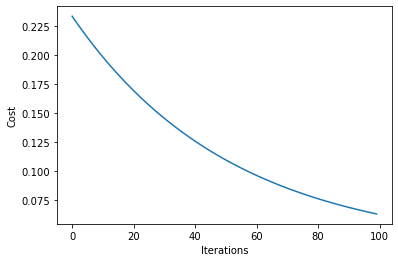

In [36]:
#Same process as before
q3_w2, q3_c2 = grad_descent(x_train, y_train, 0.01, 100) 
q3_y_hat2 = predict(x_train, q3_w2[-1],)


q3_error2 = q3_y_hat2 - y_train 

error_df2 = pd.DataFrame({'Q3 Error 2': q3_error2})
display(error_df2)

print("2nd Q3 r^2 : ", r2_score(y_train,q3_y_hat2))

plot_costs(q3_c2)

,Q3 Error 3
24,-0.229875
43,0.182610
101,-0.177000
163,-0.078475
21,0.388622
...,...
113,0.095347
64,-0.133822
15,-0.281723
125,-0.232681


3rd Q3 r^2 :  0.9238935795583388


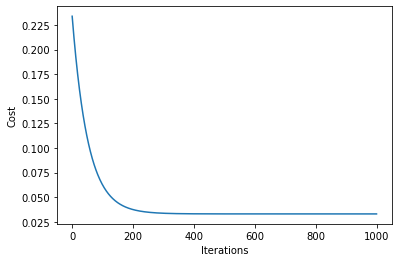

In [37]:
#Same process as before
q3_w3, q3_c3 = grad_descent(x_train, y_train, 0.01, 1000) 
q3_y_hat3 = predict(x_train, q3_w3[-1],)


q3_error3 = q3_y_hat3 - y_train 

error_df3 = pd.DataFrame({'Q3 Error 3': q3_error3})
display(error_df3)

print("3rd Q3 r^2 : ", r2_score(y_train,q3_y_hat3))

plot_costs(q3_c3)

,Q3 Error 2
24,-0.229943
43,0.182630
101,-0.177031
163,-0.078436
21,0.388667
...,...
113,0.095403
64,-0.133840
15,-0.281735
125,-0.232745


4th Q3 r^2 :  0.9238935852366272


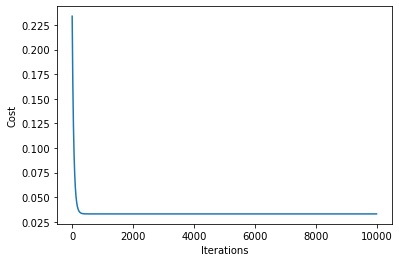

In [38]:
#Same process as before
q3_w4, q3_c4 = grad_descent(x_train, y_train, 0.01, 10000) 
q3_y_hat4 = predict(x_train, q3_w4[-1],)


q3_error4 = q3_y_hat4 - y_train 

error_df4 = pd.DataFrame({'Q3 Error 2': q3_error4})
display(error_df4)

print("4th Q3 r^2 : ", r2_score(y_train,q3_y_hat4))

plot_costs(q3_c4)

Of the data that have been displayed for the past 4 cells, the graph is the most obvious in change. It shows that the more iterations occur, the lower the cost goes and the curve bends. This means that it also gets more accurate. Another way of showing accuracy is looking at the error and r&2 factors. The errors decrease while the r^2 scores increase, but they both cap at the 3rd example: using 1000 iterations, showing that a thousand iterations is suffice to get the values needed in the model.

# Q.4

The optimal number of iterations is:  2526


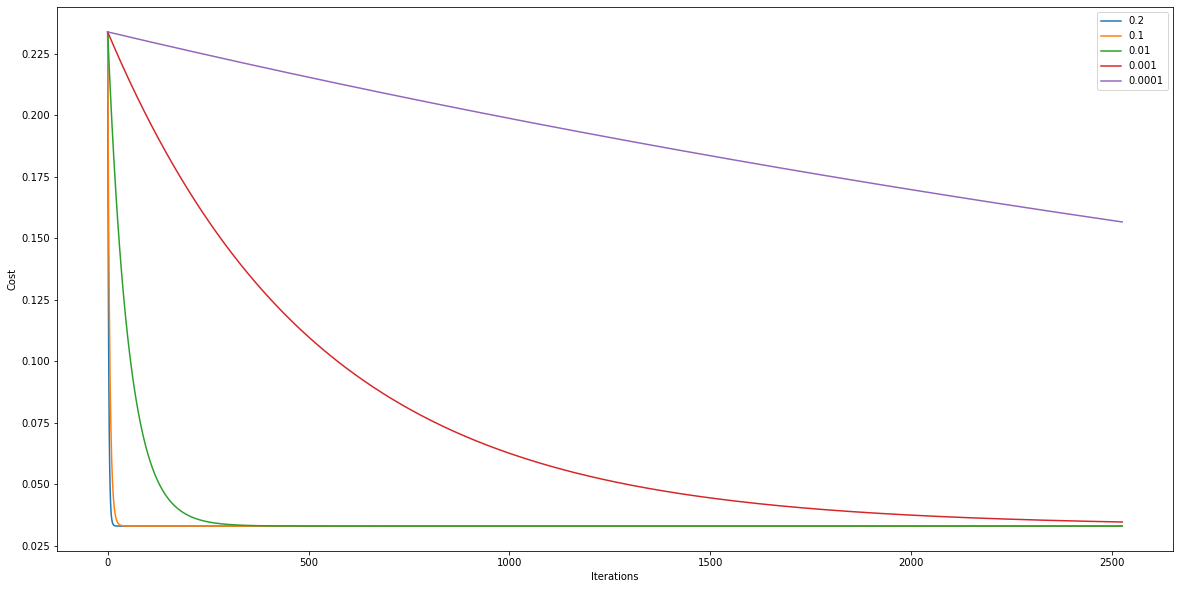

In [41]:
#array of learining rates in decreasing order
learning_rates = [0.2, 0.1, 0.01, 0.001, 0.0001]

#the ideal iteration is take from question 3, getting the index of the minimum cost
ideal_iter = q3_c4.index(min(q3_c4))
print("The optimal number of iterations is: ", ideal_iter)

plt.figure(figsize=(20,10))

#for loop for every element in learning_rates
for i in learning_rates:
    #performgradient descent
    lrate_w, lrate_c = grad_descent(x_train, y_train, i, ideal_iter) 
    
    #plot the current element's line
    plt.plot(range(ideal_iter), lrate_c, label=i)

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

As show on the graph: as the learning rates decrease, the less it is likely to lower the cost. The higher learning rates need lesser iterations to have a lower cost to use for accuracy.

# Q.5 

The relationship shown between the learning rate and number of iterations is inversely proportional. As stated on the cell before, lesser iterations are needed as the learning rate increases.

# Q.6

In [49]:
#initialize linereg algorithm
linreg = LinearRegression()

# fittingg the data
linreg.fit(x_train, y_train)
q6_y_hat1 = predict(x_train,linreg.coef_)

#calculate r^2 score of Least Squares
print("Least Squares R^2:", r2_score(y_train, q6_y_hat1))

# using gradient descent for Gradient Descent
q6_w, q6_c = grad_descent(x_train, y_train, 0.01, ideal_iter) 
q6_y_hat2 = predict(x_train, q6_w[-1],)

print("Gradient Descent R^2:", r2_score(y_train, q6_y_hat2))


Least Squares R^2: 0.9229500624245376
Gradient Descent R^2: 0.9238935852366272


Using SKLEARN to get the r^2 score via linear regression, we have the value of 0.9229. Gradient descent, on the other hand, is what we have been trying to solve this whole homework. The values, while not exact, are highly close to each other. This shows that either of the two algorithms,though using different processes, yields nearly the same results.